# DBSCAN & K-Means
## Weather Station Clustering

Density-based Spatial Clustering of Applications with Noise (**DBSCAN**) is a clustering algorithm that groups points together that are closely packed together (e.g., several nearby neighbours). *Outliers* are defined as points that are alone in low-density regions.

In this notebook, we will cover how we can use the DBSCAN algorithm to cluster weather stations together with a given dataset using Python and Scikit-Learn.

For comparison, **KMeans** clustering results are also persented below

*Updated version of 'Weather Station Clustering' by Saeed Aghabozorgi & Polong Lin*

<u>**Table of Contents**</u>
 - <a href="#D">Data</a>
 - <a href="#DC">Data Cleaning</a>
 - <a href="#DV">Data Visualization</a>
 - <a href="#CL">Location Clustering</a>
     - <a href="#CL_D">w/ DBSCAN</a>
     - <a href="#CL_K">w/ KMeans</a>
 - <a href="#CLT">Location & Temperature Clustering</a>
     - <a href="#CLT_D">w/ DBSCAN</a>
     - <a href="#CLT_K">w/ KMeans</a>

#### Downloading necessary libraries

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install sklearn

#### Importing necessary libraries

In [2]:
import csv
import numpy as np
import pandas as pd

# Plotting
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import sklearn.utils

%matplotlib inline

## <a name="D">Data</a>
We will be using data from Environment Canada about weather stations for the year of 2014.

### Download data
The data that we will use in this notebook is currently hosted on `box.ibm.com`. We will download this file using the `wget` bash command. The below line will download the file and rename it to `weather-stations20140101-20141231.csv` and place it in the current working directory.

You can manipulate the first argument after `-O` to control where the file is saved. The first argument is the relative path to store the file. Please note the import command in the next step must be changed so the correct file is imported.

In [3]:
!wget -O weather-stations20140101-20141231.csv https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv

--2018-02-16 19:16:20--  https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.25.197, 107.152.24.197
Connecting to ibm.box.com (ibm.box.com)|107.152.25.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv [following]
--2018-02-16 19:16:21--  https://ibm.ent.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.27.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.27.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/QXGysxQv7kyWbHZekOu8otwqnp7FCD0nYuFIFVBddcbyXZL7cY52C4AU3jm2x4MYXsjv9ITvGUThLN4X-kkydxoiaKkuLaGxtn19emD6JR6zyTm2PohwFy3FNRTkzzdMZmIGi3d-89DzPBMbHsMTUamzUa0hxuzJXmkXEe4uoq-pW9EW5qB2znoxJKzQEtfg60Ees-SJLKuh3l7S9AIc5ay0w25T5Qjhw1AwCnAXFyk9mnBdBjYB9yYxI0XT5NwdrFn3EXzyt

### Read in data

In [3]:
df = pd.read_csv('weather-stations20140101-20141231.csv')
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### Data Structure
Here is the structure of the data imported: 

- Stn_Name:::: Station Name
- Lat :::: Latitude (North + , degrees)
- Long :::: Longitude (West - , degrees)
- Prov :::: Province
- Tm :::: Mean Temperature (Â°C)
- DwTm :::: Days without Valid Mean Temperature
- D :::: Mean Temperature difference from Normal (1981-2010) (Â°C)
- Tx :::: Highest Monthly Maximum Temperature (Â°C)
- DwTx :::: Days without Valid Maximum Temperature
- Tn :::: Lowest Monthly Minimum Temperature (Â°C)
- DwTn :::: Days without Valid Minimum Temperature
- S :::: Snowfall (cm)
- DwS :::: Days without Valid Snowfall
- S%N :::: Percent of Normal (1981-2010) Snowfall
- P :::: Total Precipitation (mm)
- DwP :::: Days without Valid Precipitation
- P%N :::: Percent of Normal (1981-2010) Precipitation
- S_G :::: Snow on the ground at the end of the month (cm)
- Pd :::: Number of days with Precipitation 1.0 mm or more
- BS :::: Bright Sunshine (hours)
- DwBS :::: Days without Valid Bright Sunshine
- BS% :::: Percent of Normal (1981-2010) Bright Sunshine
- HDD :::: Degree Days below 18 Â°C
- CDD :::: Degree Days above 18 Â°C
- Stn_No :::: Climate station identifier (first 3 digits indicate drainage basin, last 4 characters are for sorting alphabetically).
- NA :::: Not Available

## <a name="DC">Data Cleaning</a>
We will only be doing light cleaning of this dataset. 

### Info
Let's get some information regarding the nulls in the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
Stn_Name    1341 non-null object
Lat         1341 non-null float64
Long        1341 non-null float64
Prov        1341 non-null object
Tm          1256 non-null float64
DwTm        1256 non-null float64
D           357 non-null float64
Tx          1260 non-null float64
DwTx        1260 non-null float64
Tn          1260 non-null float64
DwTn        1260 non-null float64
S           586 non-null float64
DwS         586 non-null float64
S%N         198 non-null float64
P           1227 non-null float64
DwP         1227 non-null float64
P%N         209 non-null float64
S_G         798 non-null float64
Pd          1227 non-null float64
BS          0 non-null float64
DwBS        0 non-null float64
BS%         0 non-null float64
HDD         1256 non-null float64
CDD         1256 non-null float64
Stn_No      1341 non-null object
dtypes: float64(22), object(3)
memory usage: 262.0+ KB


### Drop some null rows/columns
We will drop the rows that are null in the `Tm` column, we will also drop the columns `BS`,`DwBS`, and `BS%` because they have no values.

In [5]:
# Drop Tm null rows
df = df[pd.notnull(df["Tm"])]

# Drop BS,DwBS, and BS% columns
df.drop(['BS','DwBS','BS%'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 0 to 1340
Data columns (total 22 columns):
Stn_Name    1256 non-null object
Lat         1256 non-null float64
Long        1256 non-null float64
Prov        1256 non-null object
Tm          1256 non-null float64
DwTm        1256 non-null float64
D           357 non-null float64
Tx          1256 non-null float64
DwTx        1256 non-null float64
Tn          1255 non-null float64
DwTn        1255 non-null float64
S           511 non-null float64
DwS         511 non-null float64
S%N         182 non-null float64
P           1144 non-null float64
DwP         1144 non-null float64
P%N         193 non-null float64
S_G         733 non-null float64
Pd          1144 non-null float64
HDD         1256 non-null float64
CDD         1256 non-null float64
Stn_No      1256 non-null object
dtypes: float64(19), object(3)
memory usage: 225.7+ KB


## <a name="DV">Data Visualization</a>

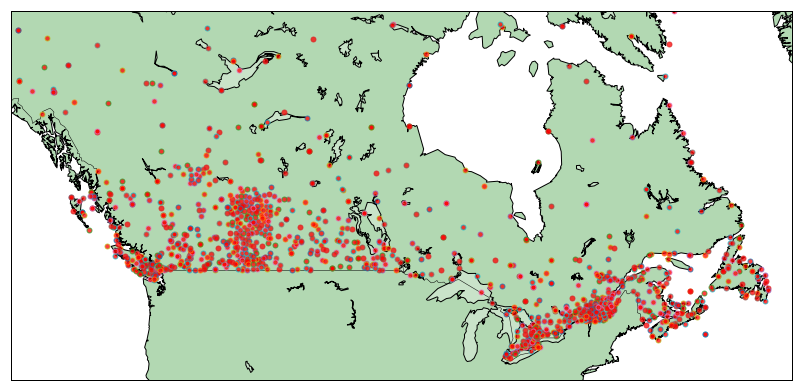

In [6]:
plt.figure(figsize=(14,10))

Long = [-140,-50] # Longitude Range
Lat = [40,65] # Latitude Range

# Query dataframe for long/lat in the above range
df = df[
    (df['Long'] > Long[0])
    & (df['Long'] < Long[1])
    & (df['Lat'] > Lat[0])
    & (df['Lat'] < Lat[1])
]

# Create basemap map
my_map = Basemap(
    projection='merc',
    resolution='l',
    area_thresh = 1000.0,
    llcrnrlon = Long[0],     # Lower latitude
    urcrnrlon = Long[1],     # Upper longitude
    llcrnrlat = Lat[0],      # Lower latitude
    urcrnrlat = Lat[1]       # Upper latitude
)

# Basemap map drawing parameters
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color='green',alpha=0.3)
my_map.shadedrelief()

# Get x,y position of points on map using my_map
my_longs = df.Long.values
my_lats = df.Lat.values

X,Y = my_map(my_longs, my_lats)

# Add x,y to dataframe
df['xm'] = X
df['ym'] = Y

# Draw weather stations on map:
for (x,y) in zip(X,Y):
    my_map.plot(x,y,
                markerfacecolor=([1,0,0]),
                marker = 'o',
                markersize = 5,
                alpha = 0.75)

## <a name="CL">Location Clustering</a>
Now we will cluster the stations based only on their location, i.e., longitude, and latitude.

### Preprocess data

In [7]:
sklearn.utils.check_random_state(1000)

# Zip together x, and y position in map
loc = [list(a) for a in zip(X,Y)]

# convert nans to real numbers
loc = np.nan_to_num(loc)

# scale the data between 0 and 1
scaler = StandardScaler()
loc = scaler.fit_transform(loc)

### <a name="CL_D">w/ DBSCAN</a>

#### Clustering

In [8]:
# Create DBSCAN object
db = DBSCAN(eps=0.15, min_samples=10)

# Train
db.fit(loc)

# Get output
mask = np.zeros_like(db.labels_, dtype=bool)
mask[db.core_sample_indices_] = True
labels = db.labels_ + 1 # make from range 0:5 instead of -1:4

In [9]:
# Add labels to dataframe
df['DBSCAN_L_Clusters'] = labels

# View sample of clusters
df[["Stn_Name","Tx","Tm","DBSCAN_L_Clusters"]].head()

,Stn_Name,Tx,Tm,DBSCAN_L_Clusters
0,CHEMAINUS,13.5,8.2,1
1,COWICHAN LAKE FORESTRY,15.0,7.0,1
2,LAKE COWICHAN,16.0,6.8,1
4,DUNCAN KELVIN CREEK,14.5,7.7,1
5,ESQUIMALT HARBOUR,13.1,8.8,1


#### Cluster visualization
Now let's visualize our clusters on a map:

Cluster 0, Avg Temp: -20.55395348837208
Cluster 1, Avg Temp: -5.538747553816051
Cluster 2, Avg Temp: 1.9526315789473685
Cluster 3, Avg Temp: -9.195652173913045
Cluster 4, Avg Temp: -15.300833333333333
Cluster 5, Avg Temp: -7.769047619047619


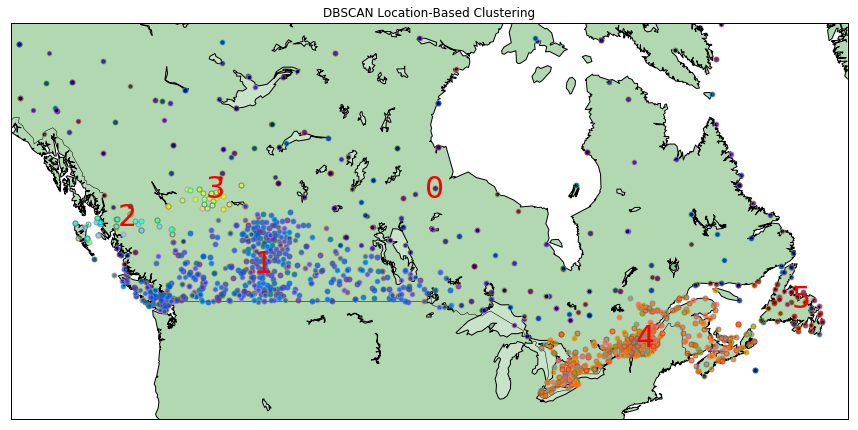

In [10]:
# Create basemap map
plt.figure(figsize=(15,15))
plt.title('DBSCAN Location-Based Clustering')

my_map = Basemap(
    projection='merc',
    resolution='l',
    area_thresh = 1000.0,
    llcrnrlon = Long[0],     # Lower latitude
    urcrnrlon = Long[1],     # Upper longitude
    llcrnrlat = Lat[0],      # Lower latitude
    urcrnrlat = Lat[1]       # Upper latitude
)

# Basemap map drawing parameters
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color='green',alpha=0.3)
my_map.shadedrelief()

# Create color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels))))

# Plot x,y points, and color by cluster
for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym, 
                markerfacecolor=colors[row.DBSCAN_L_Clusters],
                marker = 'o',
                markersize = 5,
                alpha = 0.75
               )
# Label clusters                
for i in range(len(set(labels))):
    cluster = df[df.DBSCAN_L_Clusters == i][["Stn_Name","Tm","xm","ym","DBSCAN_L_Clusters"]]
    
    # Get centroid of cluster
    xc = np.mean(cluster.xm)
    yc = np.mean(cluster.ym)
    
    # Get mean temp of cluster
    Tavg = np.mean(cluster.Tm)
    
    # label cluster on map
    plt.text(xc,yc,str(i),fontsize=30,color='red')
    
    # Print average temperatures
    print ("Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm)))
    

### <a name="CL_K">w/ KMeans</a>

#### Clustering

In [11]:
# Create KMeans object
kmeans = KMeans(n_clusters=7)

# Train
kmeans.fit(loc)

# Get output
labels = kmeans.labels_ 

In [12]:
# Add labels to dataframe
df['Kmeans_L_Clusters'] = labels

# View sample of clusters
df[["Stn_Name","Tx","Tm","Kmeans_L_Clusters"]].head()

,Stn_Name,Tx,Tm,Kmeans_L_Clusters
0,CHEMAINUS,13.5,8.2,3
1,COWICHAN LAKE FORESTRY,15.0,7.0,3
2,LAKE COWICHAN,16.0,6.8,3
4,DUNCAN KELVIN CREEK,14.5,7.7,3
5,ESQUIMALT HARBOUR,13.1,8.8,3


#### Cluster visualization
Now let's visualize our clusters on a map:

Cluster 0, Avg Temp: -9.674439461883406
Cluster 1, Avg Temp: -19.174820143884897
Cluster 2, Avg Temp: -19.381818181818183
Cluster 3, Avg Temp: 1.4763888888888896
Cluster 4, Avg Temp: -29.264516129032263
Cluster 5, Avg Temp: -15.262878787878785
Cluster 6, Avg Temp: -15.065109034267904


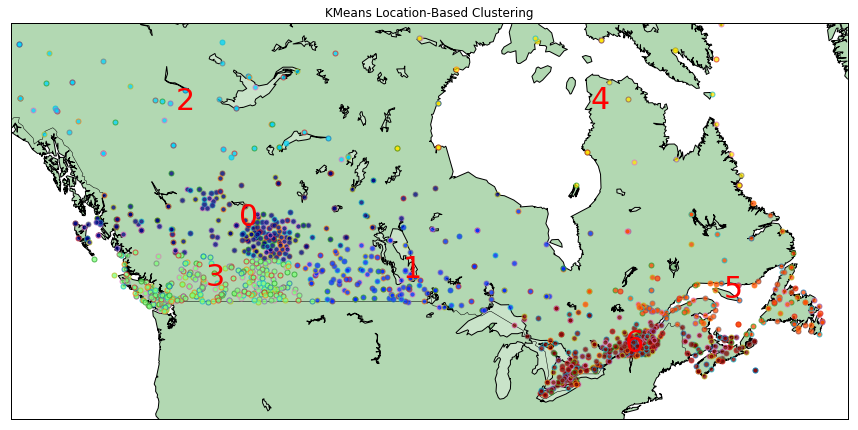

In [13]:
# Create basemap map
plt.figure(figsize=(15,15))
plt.title('KMeans Location-Based Clustering')

my_map = Basemap(
    projection='merc',
    resolution='l',
    area_thresh = 1000.0,
    llcrnrlon = Long[0],     # Lower latitude
    urcrnrlon = Long[1],     # Upper longitude
    llcrnrlat = Lat[0],      # Lower latitude
    urcrnrlat = Lat[1]       # Upper latitude
)

# Basemap map drawing parameters
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color='green',alpha=0.3)
my_map.shadedrelief()

# Create color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels))))

# Plot x,y points, and color by cluster
for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym, 
                markerfacecolor=colors[row.Kmeans_L_Clusters],
                marker = 'o',
                markersize = 5,
                alpha = 0.75
               )
# Label clusters                
for i in range(len(set(labels))):
    cluster = df[df.Kmeans_L_Clusters == i][["Stn_Name","Tm","xm","ym","Kmeans_L_Clusters"]]
    
    # Get centroid of cluster
    xc = np.mean(cluster.xm)
    yc = np.mean(cluster.ym)
    
    # Get mean temp of cluster
    Tavg = np.mean(cluster.Tm)
    
    # label cluster on map
    plt.text(xc,yc,str(i),fontsize=30,color='red')
    
    # Print average temperatures
    print ("Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm)))
    

## <a name="CLT">Location & Temp Clustering</a>
Now we will cluster the stations based on their location, i.e., longitude, and latitude, and temperature.

### Preprocess data

In [14]:
sklearn.utils.check_random_state(1000)

# Grab numpy arrays from dataframe
X = df.xm.values
Y = df.ym.values
Tx = df.Tx.values
Tn = df.Tn.values
Tm = df.Tm.values

# Zip together x, and y position in map
data = [list(a) for a in zip(X,Y,Tx,Tn,Tm)]

# convert nans to real numbers
data = np.nan_to_num(data)

# scale the data between 0 and 1
scaler = StandardScaler()
data = scaler.fit_transform(data)

### <a name="CLT_D">w/ DBSCAN</a>

#### Clustering

In [15]:
# Create DBSCAN object
db = DBSCAN(eps=0.3, min_samples=10)

# Train
db.fit(data)

# Get output
mask = np.zeros_like(db.labels_, dtype=bool)
mask[db.core_sample_indices_] = True
labels = db.labels_ + 1 # make from range 0:5 instead of -1:4

In [16]:
# Add labels to dataframe
df['DSCAN_LT_Clusters'] = labels

# View sample of clusters
df[["Stn_Name","Tx","Tm","DSCAN_LT_Clusters"]].head()

,Stn_Name,Tx,Tm,DSCAN_LT_Clusters
0,CHEMAINUS,13.5,8.2,1
1,COWICHAN LAKE FORESTRY,15.0,7.0,1
2,LAKE COWICHAN,16.0,6.8,1
4,DUNCAN KELVIN CREEK,14.5,7.7,1
5,ESQUIMALT HARBOUR,13.1,8.8,1


#### Visualize clusters
Now let's visualize our clusters on a map:

Cluster 0, Avg Temp: -14.876168224299068
Cluster 1, Avg Temp: 6.2211920529801334
Cluster 2, Avg Temp: 6.790000000000001
Cluster 3, Avg Temp: -0.49411764705882355
Cluster 4, Avg Temp: -13.877209302325586
Cluster 5, Avg Temp: -4.186274509803922
Cluster 6, Avg Temp: -16.301503759398482
Cluster 7, Avg Temp: -13.599999999999998
Cluster 8, Avg Temp: -9.753333333333334
Cluster 9, Avg Temp: -4.258333333333334


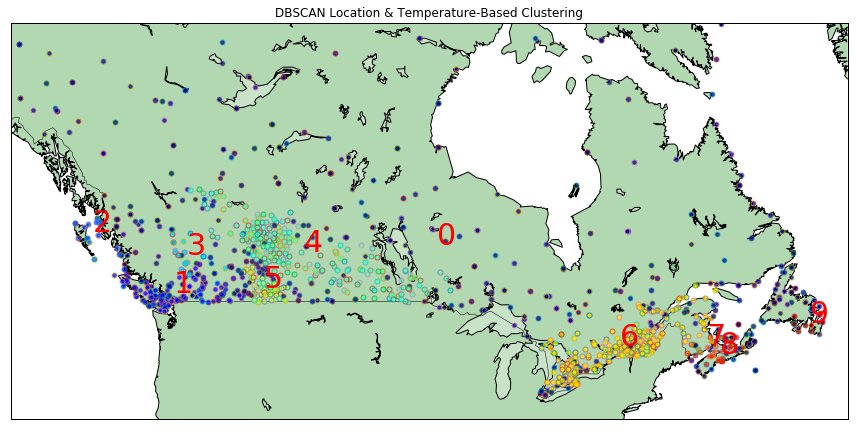

In [17]:
# Create basemap map
plt.figure(figsize=(15,15))
plt.title('DBSCAN Location & Temperature-Based Clustering')

my_map = Basemap(
    projection='merc',
    resolution='l',
    area_thresh = 1000.0,
    llcrnrlon = Long[0],     # Lower latitude
    urcrnrlon = Long[1],     # Upper longitude
    llcrnrlat = Lat[0],      # Lower latitude
    urcrnrlat = Lat[1]       # Upper latitude
)

# Basemap map drawing parameters
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color='green',alpha=0.3)
my_map.shadedrelief()

# Create color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels))))

# Plot x,y points, and color by cluster
for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym, 
                markerfacecolor=colors[row.DSCAN_LT_Clusters],
                marker = 'o',
                markersize = 5,
                alpha = 0.75
               )
# Label clusters                
for i in range(len(set(labels))):
    cluster = df[df.DSCAN_LT_Clusters == i][["Stn_Name","Tm","xm","ym","DSCAN_LT_Clusters"]]
    
    # Get centroid of cluster
    xc = np.mean(cluster.xm)
    yc = np.mean(cluster.ym)
    
    # Get mean temp of cluster
    Tavg = np.mean(cluster.Tm)
    
    # label cluster on map
    plt.text(xc,yc,str(i),fontsize=30,color='red')
    
    # Print average temperatures
    print ("Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm)))

### <a name="CLT_D">w/ KMeans</a>

#### Clustering

In [18]:
# Create KMeans object
kmeans = KMeans(n_clusters=7)

# Train
kmeans.fit(data)

# Get output
labels = kmeans.labels_

In [19]:
# Add labels to dataframe
df['KMeans_LT_Clusters'] = labels

# View sample of clusters
df[["Stn_Name","Tx","Tm","KMeans_LT_Clusters"]].head()

,Stn_Name,Tx,Tm,KMeans_LT_Clusters
0,CHEMAINUS,13.5,8.2,5
1,COWICHAN LAKE FORESTRY,15.0,7.0,5
2,LAKE COWICHAN,16.0,6.8,5
4,DUNCAN KELVIN CREEK,14.5,7.7,5
5,ESQUIMALT HARBOUR,13.1,8.8,5


#### Visualize clusters
Now let's visualize our clusters on a map:

Cluster 0, Avg Temp: -9.214953271028039
Cluster 1, Avg Temp: -8.168498168498168
Cluster 2, Avg Temp: -28.505555555555556
Cluster 3, Avg Temp: -20.11242603550296
Cluster 4, Avg Temp: -16.331269349845197
Cluster 5, Avg Temp: 5.385781990521329
Cluster 6, Avg Temp: -17.853846153846153


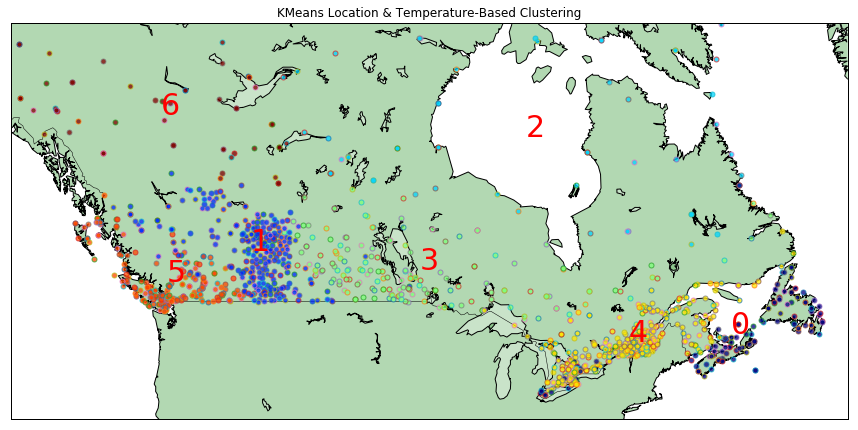

In [20]:
# Create basemap map
plt.figure(figsize=(15,15))
plt.title('KMeans Location & Temperature-Based Clustering')

my_map = Basemap(
    projection='merc',
    resolution='l',
    area_thresh = 1000.0,
    llcrnrlon = Long[0],     # Lower latitude
    urcrnrlon = Long[1],     # Upper longitude
    llcrnrlat = Lat[0],      # Lower latitude
    urcrnrlat = Lat[1]       # Upper latitude
)

# Basemap map drawing parameters
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color='green',alpha=0.3)
my_map.shadedrelief()

# Create color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels))))

# Plot x,y points, and color by cluster
for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym, 
                markerfacecolor=colors[row.KMeans_LT_Clusters],
                marker = 'o',
                markersize = 5,
                alpha = 0.75
               )
# Label clusters                
for i in range(len(set(labels))):
    cluster = df[df.KMeans_LT_Clusters == i][["Stn_Name","Tm","xm","ym","KMeans_LT_Clusters"]]
    
    # Get centroid of cluster
    xc = np.mean(cluster.xm)
    yc = np.mean(cluster.ym)
    
    # Get mean temp of cluster
    Tavg = np.mean(cluster.Tm)
    
    # label cluster on map
    plt.text(xc,yc,str(i),fontsize=30,color='red')
    
    # Print average temperatures
    print ("Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm)))